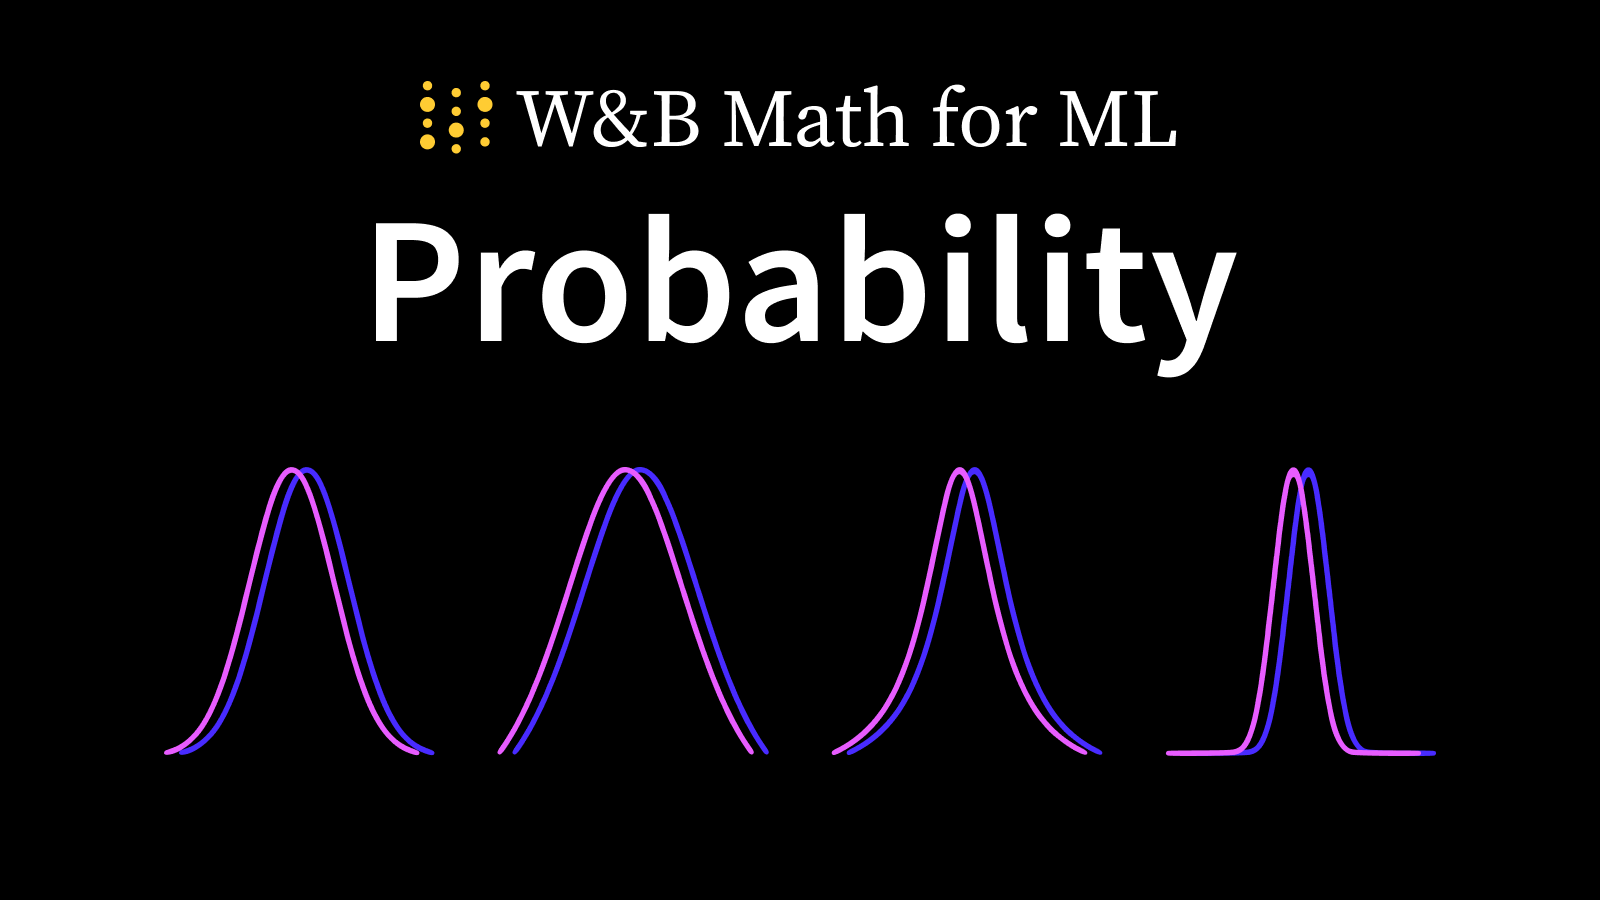

# Extras

## Setup Code

This section includes setup code for the remaining sections.

In [ ]:
%%capture

if "google.colab" in str(get_ipython()):
    %cd "/content/"
    !git clone "https://github.com/wandb/edu.git"
    %cd "edu/math-for-ml"
    !pip install --upgrade -r requirements-colab.txt
    %cd "03_probability"
else:
    pass

# allows interactive plotting
%matplotlib widget

# importing from standard library
import random
import sys

# importing libraries
import IPython
import matplotlib.pyplot as plt
import numpy as np

if "../" not in sys.path:
    sys.path.append("../")

# importing course-specific modules
import utils

# Visualizing and Minimizing Surprises

In machine learning,
we often devise complex models that implement high-dimensional
and/or highly non-linear functions of the inputs.

While this brings a lot of power,
it often obscures the central concepts,
like the surprise,
aka negative log probabilty.

In these two examples, we'll consider a very simple model:
one that takes no inputs and produces a single value.

Informally, we implicitly make these sorts of simple models
without realizing it all the time:
for example, whenever we summarize polling data by saying
something like "53% +/- 1 of those surveyed approved".

Similarly, any time we calculate the mean $\mu$
and standard deviation, $\sigma$, of a dataset,
and summarize the result as $\mu+/-\sigma$,
we've formed a model,
and we've actually minimized a surprise,
or maximized a likelihood.

Below, we'll examine that relationship.

## Artisanal, Hand-Tuned, Small-Batch Data Science

Typically, we minimize the surprises of our models with algorithms,
like gradient descent.
As a special case, this includes calculating the best model parameters directly.

But there's nothing to say we couldn't do it ourselves!

The cell below generates an interactive plot showing a histogram of some data
and a tuneable Gaussian density.
By adjusting the sliders,
you can move the center of this distribution and change its spread.
Underneath, the surprise is printed.

It is calculated by taking the average of the logarithm of the Gaussian density,
evaluated at each of the values in `data`.

In [ ]:
true_mu = -1.; true_sigma = 0.5; N = 20;
data = true_sigma * np.random.standard_normal(size=N) + true_mu


fitter = utils.mle.make_gauss_fitter(data, true_mu, true_sigma)
utils.mle.make_interactor(fitter, mu_lims=[-10, 10], sigma_lims=[1e-3, 10]);

To begin, make the surprise as low as possible.

You might check in which direction the surprise goes down,
for each parameter, and move one step in that direction.
This is the by-hand version of the algorithm
[coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent).

#### Q Spatially, how do the probability density and the data relate at this point? Is the density high or low  where the histogram indicates the presence of more data points?

By default, the values of $\mu$ and $\sigma$ used to generate
the data are `0` and `0.5`,
respectively.

#### Q Is the value you landed on equal to these "ground truth" values? Do you find this surprising?

The cell below computes the mean and standard deviation of the data.

In [ ]:
np.mean(data), np.std(data)

Input these numbers as values for $\mu$ and $\sigma$
by clicking the values next to the sliders and typing (or copy-pasting) them in.

#### Q Is the surprise higher or lower than the surprise you found by hand? Relate this finding to the statement above, that every time we summarize data by the mean and standard deviation, we've minimized the surprise of a model.

Increase the value of `N`,
which sets the total number of values in `data`,
by at least an order of magnitude, e.g. to `200`.

Then fit the model again, by minimizing the surprise.

#### Q Are the values you found the same? Are they closer to or further from the "true" values?

Increase the value of `N` by another order of magnitude.

#### Q Are the values of $\mu$ and $\sigma$ now closer or further from the values used to generate the data?

#### Q What happens to the surprise if you reduce $\sigma$ to extremely values, e.g. 1e-3?

## Visualizing the Surprise as a Function of the Parameters

The section above visualized the surprise as a function of the data values:
$$
s(x; \mu, \sigma) = -\log(p(x; \mu, \sigma))
$$
where $p(\cdot; \mu, \sigma)$
is the probability density associated with the parameters
$\mu$ and $\sigma$,
which assigns a probability to all possible observations.

But when we are working with models,
we aren't concerned directly with the 
probabilities of observing data points --
the data has already been observed.

We are instead interested in which parameters
to use to help us model the data,
and so are interested in $s$ as a function of $\mu$ and $\sigma$ instead.

In the jargon of machine learning, an object like that,
which is a probability density when thought of as a function over data values
but which we're thinking of as a function over parameter values,
is called a _likelihood_.

The cell below visualizes the surprise of the same, simple model
as function of a single parameter, $\mu$,
that is, as a negative logarithm of the likelihood.

This is the quantity which we are minimizing when we git models.

Before proceeding, return to the data generation cell above
and change `N` back to `20`.

Then execute the cell below.

In [ ]:
utils.mle.make_plot(data, num_gaussians=5, true_mu=true_mu);

print("The surprise-minimizing estimate for µ is "+str(np.mean(data)))
print("The value of µ used to generate the data is "+str(true_mu))

#### Q What is type of function is the model surprise in the top panel (e.g. trigonometric,  exponential, linear)? Can you explain why it has that shape?

The surprise-minimizing value of $\mu$ is indicated by a star.

#### Q Relate the fact that this value minimizes the surprise to the features of the graph of the surprise.

If you are familiar with gradient descent, answer the question below.

#### Q Explain why a gradient descent-based method for minimizing the surprise is attracted to this point and why it does not leave once it reaches it.

Re-run this cell after increasing the value of `N` by at least an order of magnitude.
If the answer is unclear, consider increasing `N` even more.

#### Q Does the general shape of the surprise change with the value of `N`? What, if anything, does change about it?

# The Central Limit Theorem In Action

The previous example used, as do many machine learning models,
a Gaussian density for the model surprise,
which corresponds to using the squared error for the loss function.

This choice is convenient, but is it justified?

The classic justification for it is as follows:
the things we aren't measuring and including in our model are
- **numerous** -- any model is a massive simplification of the real world
- **independent or weakly dependent** -- otherwise we might summarize them into a single measurement and include that in our model
- **of roughly equal magnitude** -- if there are a small number with larger magntiude (variance), we also might include them in our model
- **combine additively** -- lots of physical processes behave this way

When all of these things hold,
the errors introduced by the things we aren't measuring
will have an appxroximately Gaussian distribution.
This is the Limit Theorem so important it gets to be called
the _Central Limit Theorem_.

The cells below demonstrate this theorem in action for a few different probability distributions.

Specifically, they show that if we look at the distribution obtained by adding
a whole colection of random variables, each of which has the same distribution,
we will see a Gaussian.

In [ ]:
coin_flip = [0.5, 0.5] # heads, tails. "adding up" means counting how many tails you get
d6_roll = [0] + [1/6] * 6 # a six-sided die.
d20_roll = [0] + [1/20] * 20 # roll for initiative!
wonky_pmf = [1/2, 1/8] + [1/100] * 10 + [3/8 - 1/10]  # even very uneven distributions work
your_pmf_here = [] # write your own! must sum to ~1, all values >=0 and < 1

This cell selects a distribution
(more specifically, a `p`robability `m`ass `f`unction)
and number of times it should be added.

Values higher than `30` should be avoided.

In [ ]:
pmf, iters = coin_flip, 10

This cell visualizes the distribution.

Note that none are shaped anything like a Gaussian!

In [ ]:
plt.figure(); plt.bar(range(len(pmf)), pmf)
plt.title("Probability Distribution")
plt.ylabel("Probability"); plt.xlabel("Value");

This final cell produces a short animation showing the evolution of the distribution
as more and more variables are added together.

In [ ]:
anim_html = utils.clt.setup_and_run_animation(pmf, iters)

IPython.display.HTML(anim_html)

#### Q How many iterations would you say it takes for each example to "converge" to the limit and appear approximately Gaussian?

Though all get there in the end, some take longer than others.

#### Q Of the four provided `pmf`s, which takes the longest to resemble a Gaussian? Can you articulate what about it seems to cause the issue?